In [2]:
%config Completer.use_jedi = False
import networkx as nx
import numpy as np
from pyemma import msm
from tables import *
import pyemma
import pandas as pd
P = np.array([[0.9, 0.1], [0.1, 0.9]])
G = nx.from_numpy_matrix(P)
mm = msm.markov_model(P)
print(mm.pi)
centrality = nx.eigenvector_centrality(G)
print(['%s %0.2f'%(node,centrality[node]) for node in centrality])

[0.5 0.5]
['0 0.71', '1 0.71']


['0 0.43', '1 0.53', '2 0.35', '3 0.64']


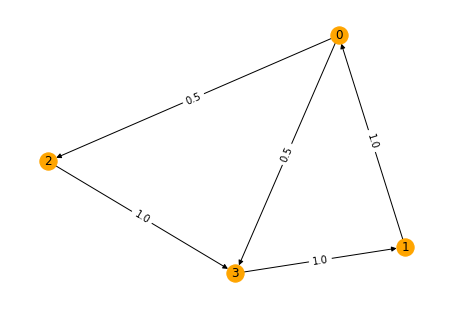

In [3]:

P = np.array([[0,   0.0, 0.5, 0.5],   # S0 
              [1.0, 0.0, 0.0, 0.0],   # S1
              [0.0, 0.0, 0.0, 1.0],   # S2
              [0,   1.0, 0.0, 0.0]])  # S3
gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_gph(g):
    pos = nx.spectral_layout(g)
    nx.draw(g, pos, with_labels=True, node_color='orange')
    labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels);

plot_gph(gP)
centrality = nx.eigenvector_centrality(gP)
print(['%s %0.2f'%(node,centrality[node]) for node in centrality])
A = nx.adjacency_matrix(gP)

In [4]:
mm = msm.markov_model(P)
print(mm.pi[0])
nx.pagerank_numpy(gP, alpha=1)

0.28571428571428575


{0: 0.285714285714286,
 1: 0.28571428571428564,
 2: 0.14285714285714282,
 3: 0.28571428571428564}

In [5]:
#nature.com/articles/srep16181

In [6]:
pm_model = pyemma.load('output/markov_modelling/complete'+'/'+'pyemma_model','simple')
P = pm_model.P
gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
print(nx.pagerank_numpy(gP, alpha=1))
pm_model.pi[0]

{0: 0.02439720744039067, 1: 0.002262168581768931, 2: 0.002521852253074231, 3: 0.0004094732633648937, 4: 0.0007010643404920396, 5: 0.0001169129026726122, 6: 0.027330235595765185, 7: 0.02653908285100513, 8: 0.00043546837621535623, 9: 0.006788713650595774, 10: 0.0030085379359198446, 11: 0.007652418979988986, 12: 0.002606501435166563, 13: 0.0003158081722546699, 14: 0.0002571035414314351, 15: 0.0022792366023761546, 16: 6.746298826045269e-05, 17: 0.001334043767917232, 18: 0.004284004854034858, 19: 0.03534630301980008, 20: 0.06410896054556182, 21: 0.0002232395450284488, 22: 0.008578054857502368, 23: 8.735758871385457e-05, 24: 0.015967002984321684, 25: 9.600740126534776e-05, 26: 0.003521385224823992, 27: 0.009104968407730512, 28: 0.0008461814301231502, 29: 0.006801077185193617, 30: 0.004687242833862777, 31: 0.0007740304308585152, 32: 0.0045681212721396395, 33: 0.005929445225931055, 34: 0.005113485491170897, 35: 0.024277743919643956, 36: 0.0031095188518155377, 37: 0.00010367063078052502, 38: 0.

0.024397207440390773

In [24]:
pm_model = pyemma.load('output/markov_modelling/complete_m'+'/'+'pyemma_model','simple')
P = pm_model.P
state_index_m = pd.read_csv('output/markov_modelling/complete_m/state_index.csv')
gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
social_bond_index = state_index_m[state_index_m.KeywordLabel=='social bonds'].index[0]
aid_giving_index = state_index_m[state_index_m.KeywordLabel=='aid giving'].index[0]
centrality = nx.eigenvector_centrality(gP,max_iter=10000)
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][social_bond_index])
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][aid_giving_index])

90 0.14
7 0.14


In [17]:
gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
centrality = nx.closeness_centrality(gP)
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][social_bond_index])
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][aid_giving_index])

90 0.77
7 0.80


In [18]:
centrality = nx.degree_centrality(gP)
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][aid_giving_index])
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][social_bond_index])

7 1.52
90 1.42


In [25]:
pm_model = pyemma.load('output/markov_modelling/complete_w'+'/'+'pyemma_model','simple')
state_index_w = pd.read_csv('output/markov_modelling/complete_w/state_index.csv')
social_bond_index = state_index_m[state_index_w.KeywordLabel=='social bonds'].index[0]
aid_giving_index = state_index_m[state_index_w.KeywordLabel=='aid giving'].index[0]
P = pm_model.P
gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
centrality = nx.eigenvector_centrality(gP,max_iter=10000)
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][social_bond_index])
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][aid_giving_index])

91 0.13
7 0.14


/miniconda3/envs/au_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/miniconda3/envs/au_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [20]:
centrality = nx.degree_centrality(gP)
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][social_bond_index])
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][aid_giving_index])

91 1.66
7 1.78


In [21]:
gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
centrality = nx.nx.closeness_centrality(gP)
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][social_bond_index])
print(['%s %0.2f'%(node,centrality[node]) for node in centrality][aid_giving_index])

91 0.82
7 0.89
